In [72]:
import numpy as np

def burgers_equation(u, dx, nu):
    # Calculate the first derivative of u w.r.t x using central difference
    ux = (np.concatenate([u[1:], [u[0]]]) - np.concatenate([[u[-1]], u[:-1]])) / (2 * dx)
    # Calculate the second derivative of u w.r.t x using central difference
    uxx = (np.concatenate([u[1:], [u[0]]]) - 2 * u + np.concatenate([[u[-1]], u[:-1]])) / dx**2
    
    # Calculate the right hand side of Burgers' equation
    return -u * ux + nu * uxx

def rk4_step(u, dx, dt, nu):
    # Calculate the first intermediate step (k1) of the RK4 method
    k1 = burgers_equation(u, dx, nu)
    # Calculate the second intermediate step (k2) using k1
    k2 = burgers_equation(u + dt/2 * k1, dx, nu)
    # Calculate the third intermediate step (k3) using k2
    k3 = burgers_equation(u + dt/2 * k2, dx, nu)
    # Calculate the fourth intermediate step (k4) using k3
    k4 = burgers_equation(u + dt * k3, dx, nu)
    
    # Combine all intermediate T to Calculate the next time step value of u
    return u + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Parameters:
L = 2 * np.pi  # Length of the space domain
N = 10  # Number of grid points in space domain
dx = L / N  # Distance between grid points
nu = 0.1  # Viscosity coefficient
dt = 0.1  # Time step size
T = int(1 / dt)  # Total number of time steps

# Initial condition:
x = np.linspace(0, L, N)
u = np.sin(x)

# Print the table header for visualization of u values
print("Step\t" + "\t".join([f"u[{i}]" for i in range(N)]))
print("----\t" + "\t".join(["-------" for _ in range(N)]))

# Evaluation using the RK4 method
for step in range(T):
    u = rk4_step(u, dx, dt, nu)
    # Print the current state of u for each time step in a tablau manner
    print(f"{step}\t" + "\t".join([f"{val:.4f}" for val in u]))


Step	u[0]	u[1]	u[2]	u[3]	u[4]	u[5]	u[6]	u[7]	u[8]	u[9]
----	-------	-------	-------	-------	-------	-------	-------	-------	-------	-------
0	0.0146	0.5893	0.9531	0.8979	0.3725	-0.3725	-0.8979	-0.9531	-0.5893	-0.0146
1	0.0264	0.5436	0.9174	0.9249	0.4063	-0.4063	-0.9249	-0.9174	-0.5436	-0.0264
2	0.0359	0.5045	0.8793	0.9463	0.4437	-0.4437	-0.9463	-0.8793	-0.5045	-0.0359
3	0.0436	0.4708	0.8403	0.9615	0.4850	-0.4850	-0.9615	-0.8403	-0.4708	-0.0436
4	0.0497	0.4416	0.8014	0.9703	0.5305	-0.5305	-0.9703	-0.8014	-0.4416	-0.0497
5	0.0546	0.4161	0.7635	0.9725	0.5804	-0.5804	-0.9725	-0.7635	-0.4161	-0.0546
6	0.0585	0.3937	0.7270	0.9682	0.6351	-0.6351	-0.9682	-0.7270	-0.3937	-0.0585
7	0.0615	0.3740	0.6924	0.9577	0.6952	-0.6952	-0.9577	-0.6924	-0.3740	-0.0615
8	0.0638	0.3564	0.6600	0.9412	0.7611	-0.7611	-0.9412	-0.6600	-0.3564	-0.0638
9	0.0656	0.3406	0.6299	0.9193	0.8337	-0.8337	-0.9193	-0.6299	-0.3406	-0.0656


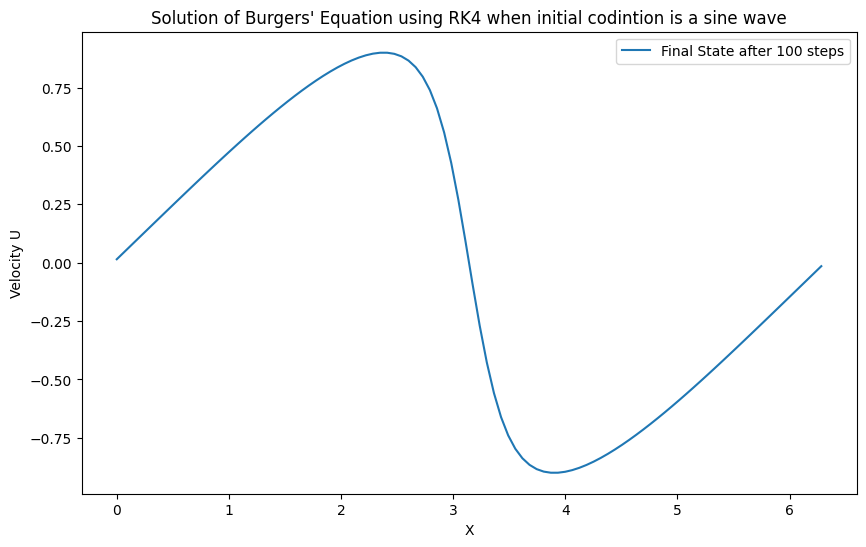

In [91]:
import numpy as np
import matplotlib.pyplot as plt


def burgers_equation(u, dx, nu):
    # Calculate the first derivative of u w.r.t x using central difference
    ux = (np.concatenate([u[1:], [u[0]]]) - np.concatenate([[u[-1]], u[:-1]])) / (2 * dx)
    # Calculate the second derivative of u w.r.t x using central difference
    uxx = (np.concatenate([u[1:], [u[0]]]) - 2 * u + np.concatenate([[u[-1]], u[:-1]])) / dx**2
    
    # Calculate the right hand side of Burgers' equation
    return -u * ux + nu * uxx

def rk4_step(u, dx, dt, nu):
    # Calculate the first intermediate step (k1) of the RK4 method
    k1 = burgers_equation(u, dx, nu)
    # Calculate the second intermediate step (k2) using k1
    k2 = burgers_equation(u + dt/2 * k1, dx, nu)
    # Calculate the third intermediate step (k3) using k2
    k3 = burgers_equation(u + dt/2 * k2, dx, nu)
    # Calculate the fourth intermediate step (k4) using k3
    k4 = burgers_equation(u + dt * k3, dx, nu)
    
    # Combine all intermediate T to Calculate the next time step value of u
    return u + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Parameters:
L = 2 * np.pi  # Length of the space domain
N = 100  # Number of grid points in space domain
dx = L / N  # Distance between grid points
nu = 0.1  # Viscosity coefficient
dt = 0.01  # Time step size
T = int(1 / dt)  # Total number of time steps

# Initial condition:
x = np.linspace(0, L, N)
u = np.sin(x)


# Evaluation using the RK4 method
for step in range(T):
    u = rk4_step(u, dx, dt, nu)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, u, label='Final State after 100 steps')
plt.title("Solution of Burgers' Equation using RK4 when initial codintion is a sine wave")
plt.xlabel('X')
plt.ylabel('Velocity U')
plt.legend()
plt.show()